# Homework #1: AB-testing<br>and the Multi-Armed Bayesian Bandit

### You have three choices... choose wisely, my friends...


|Option|The "Red" one|The "Blue" one|The "Other" one|
|-|-|-|-|
|Unknown Probability of Success|$\theta_A$ | $\theta_B$ | $\theta_C$ |

$$p(\theta_j|x_j,n_j) \propto \theta^{x_j+\alpha_j-1}(1-\theta_j)^{n-x+\beta_j-1}  \Rightarrow \; \text{What distribution?}$$

- Try one out, and collect that data update...
    - What's the data?
      The data is synthetic. Each iteration, we need to choose an option which can be done either randomly or utilising our prior beliefs. Then we need to generate the chance of success and update our beliefs accordingly.
      We roll a dice, based on the pmfs of our prior distributions. Then we pick the max of that. That's our chosen option. Then, we take a binomial sample based on the underlying true theta for our chosen option.  
    - What's the update for the posterior in question?
      In the question, we can either calculate posteriors (and therefore new priors), or keep track of the alpha and beta values. Our probability based on the prior distribution for the chosen option must be greater than the
      binomial sample of n trials with x successes, where n is the number of times we picked this option and x is the number of times we succeeded using this option previously. If the probability is greater, then we can add 1
      to the successes for this option and n, else we only increment n. 
- Which one of the three choices will you try out? How will you choose? 
    We will explore each of the three choices, based on the max of the generated rv from our three prior distributions. This has the greatest probability of winning on that iteration, based on our belief therefore we will try that one.
  
- Hints: <u>You can use *simulation* to find out the *relative belief* (i.e., probability) that each of the choices is the best.</u> Posterior distributions characterize your beliefs about the parameters $\theta_A, \theta_B$ and $\theta_C$. What can you learn by repeatedly sampling values from the posterior distribution while comparing the values of each triplet? If you know the chances that A, B, and C are the best choice, how could you balance ***exploration versus exploitation*** when choosing which of the possible options to collect the next data point on next?
  To balance exploration vs exploitation, we need to pick from the 3 choices based on comparison of our prior (or posterior depending on how you look at it) distributions. The chances of C for example would be best if C was the best, and
  eventually we would only try C.



In [3]:
import numpy as np
from scipy.stats import beta, binom
import matplotlib.pyplot as plt
np.random.seed(0)

# True values for theta
true_theta = {'A': 0.5, 'B': 0.2, 'C': 0.35}

# Number of iterations
iterations = 1000

# Initial priors
initial_alpha = {'A': 1, 'B': 1, 'C': 1}
initial_beta = {'A': 1, 'B': 1, 'C': 1}

# Initialize counters for successes and total trials
success_counts = {'A': 0, 'B': 0, 'C': 0}
total_trials = {'A': 0, 'B': 0, 'C': 0}

# Simulation loop
for i in range(iterations):
    # Generate random samples from the current posteriors
    samples = {
        'A': beta.rvs(initial_alpha['A'], initial_beta['A']),
        'B': beta.rvs(initial_alpha['B'], initial_beta['B']),
        'C': beta.rvs(initial_alpha['C'], initial_beta['C'])
    }

    # Choose the option with the highest sampled value
    chosen_option = max(samples, key=samples.get)

    # Simulate a success or failure for the chosen option
    success = samples[chosen_option] > binom.pmf(n = total_trials[chosen_option], k = success_counts[chosen_option], p = true_theta[chosen_option])

    # Update the success count and total trials for the chosen option
    success_counts[chosen_option] += success
    total_trials[chosen_option] += 1

    # Update the posterior of the chosen option
    initial_alpha[chosen_option] += success
    initial_beta[chosen_option] += 1 - success

# Display final success counts, total trials, and posterior parameters
print("Success counts:", success_counts)
print("Total trials:", total_trials)
print("Final Alpha values:", initial_alpha)
print("Final Beta values:", initial_beta)

Success counts: {'A': 985, 'B': 0, 'C': 6}
Total trials: {'A': 988, 'B': 3, 'C': 9}
Final Alpha values: {'A': 986, 'B': 1, 'C': 7}
Final Beta values: {'A': 4, 'B': 4, 'C': 4}


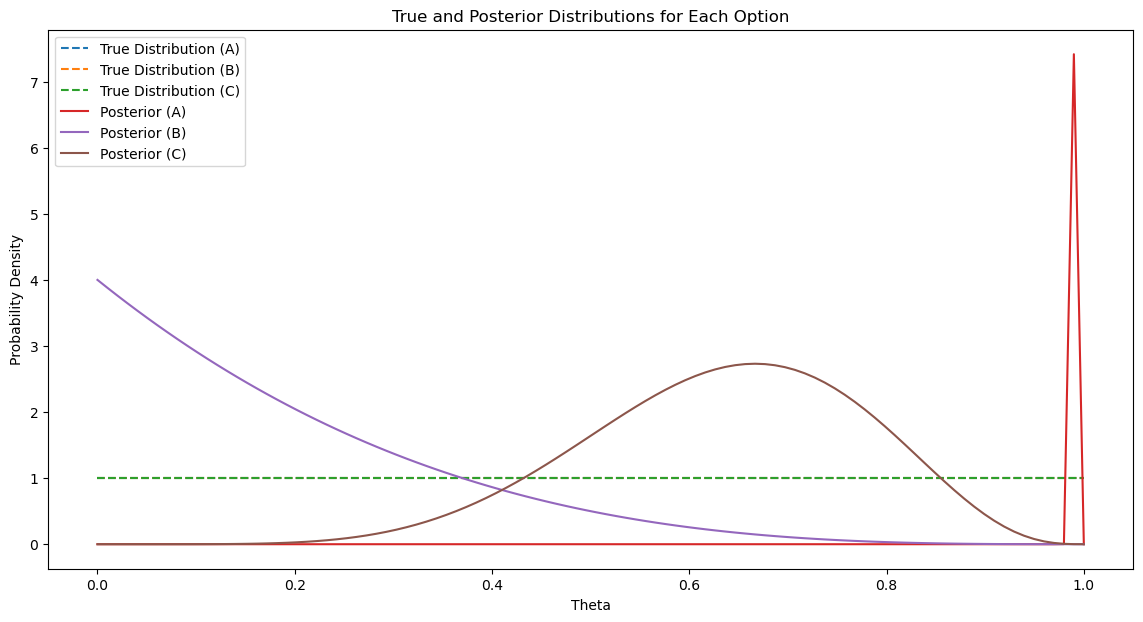

In [4]:
# not for homework, was trying to visualise the choices but didn't succeed
# Generate theta values for plotting
theta_values = np.linspace(0, 1, 100)

# Plot the true distributions
plt.figure(figsize=(14, 7))

for option in true_theta:
    true_distribution = beta.pdf(theta_values, 1, 1)
    plt.plot(theta_values, true_distribution, label=f'True Distribution ({option})', linestyle='--')

# Plot the posterior distributions
for option in initial_alpha:
    posterior_distribution = beta.pdf(theta_values, initial_alpha[option], initial_beta[option])
    plt.plot(theta_values, posterior_distribution, label=f'Posterior ({option})')

plt.legend()
plt.title('True and Posterior Distributions for Each Option')
plt.xlabel('Theta')
plt.ylabel('Probability Density')
plt.show()
